In [1]:
import os, sys, time
import numpy as np
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("→ Added to sys.path:", project_root)
print("→ cwd is:", os.getcwd())

from environments.realistic_env    import realisticAUVEnv
from agents.auv_dqn_agent          import SimpleAuvDQNAgent
from utils.rl_utils                import *

→ Added to sys.path: /Users/eirikvarnes/code/auv-rl-project
→ cwd is: /Users/eirikvarnes/code/auv-rl-project/notebooks
pygame 2.6.1 (SDL 2.28.4, Python 3.11.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
env = realisticAUVEnv(
    grid_size=(200,200),
    resolution=0.05,
    docks=1,
    dock_radius=0.5,
    dock_reward=1.0,
    use_history=True,
    history_length=3,
    window_size=(800,600),
    mass=1.0,
    drag_coef=0.5,
    dt=0.1,
    discrete_actions=True  
)

In [9]:
agent = SimpleAuvDQNAgent(env,
                          hidden_dims=[64,64],
                          lr=1e-3,
                          gamma=0.95,
                          epsilon_start=1.0,
                          epsilon_min=0.01,
                          epsilon_decay=0.997,
                          batch_size=64,
                          buffer_size=5000,
                          target_update=20)


DQN Training: 100%|██████████| 1000/1000 [03:50<00:00,  4.34it/s, Rew=-419.92, ε=0.050]


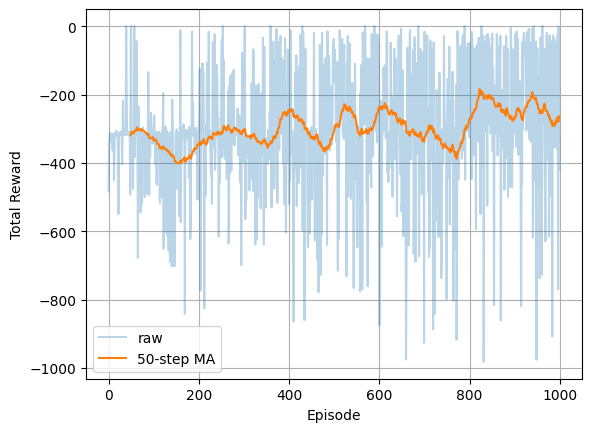

In [4]:
rewards = train_dqn(env, agent, episodes=1000, max_steps=300)
plot_rewards(rewards, window=50)
agent.save("../models/realistic_auv_dqn.pth")

In [6]:
# Evaluate the agent
sr, avg_steps = evaluate_agent(env, agent, episodes=1000, max_steps=300)
print(f"Success rate: {sr*100:.1f}%, Avg steps: {avg_steps:.1f}")

Success rate: 38.3%, Avg steps: 52.3


In [ ]:
record_headless(env, agent, out_path='../gifs/realistic_auv.gif')

Headless recording saved to ../gifs/realistic_auv.gif


In [ ]:
# Load the trained agent
agent.load("../models/realistic_auv_dqn.pth")

DQN Training: 100%|██████████| 2000/2000 [09:54<00:00,  3.36it/s, Rew=-150.73, ε=0.010] 


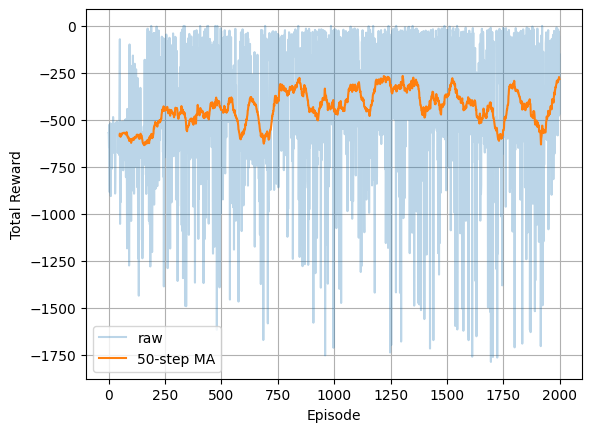

In [10]:
rewards = train_dqn(env, agent, episodes=2000, max_steps=500)
plot_rewards(rewards, window=50)
agent.save("../models/realistic_auv_dqn.pth")

In [11]:
# Evaluate the agent
sr, avg_steps = evaluate_agent(env, agent, episodes=1000, max_steps=500)
print(f"Success rate: {sr*100:.1f}%, Avg steps: {avg_steps:.1f}")

Success rate: 60.5%, Avg steps: 66.8


In [13]:
record_headless(env, agent, out_path='../gifs/realistic_auv.gif')

Headless recording saved to ../gifs/realistic_auv.gif
